Dataset shape: (150, 5)
Columns: Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')
Target variable classes: ['setosa' 'versicolor' 'virginica']


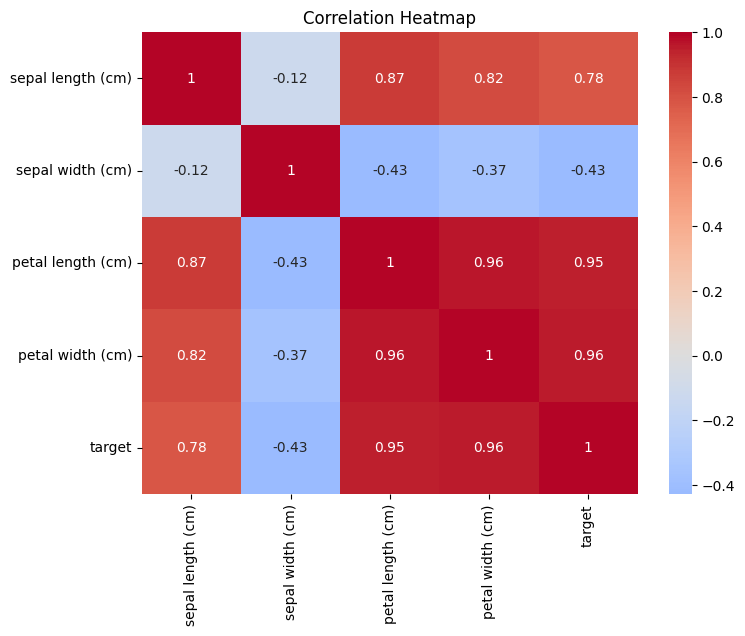

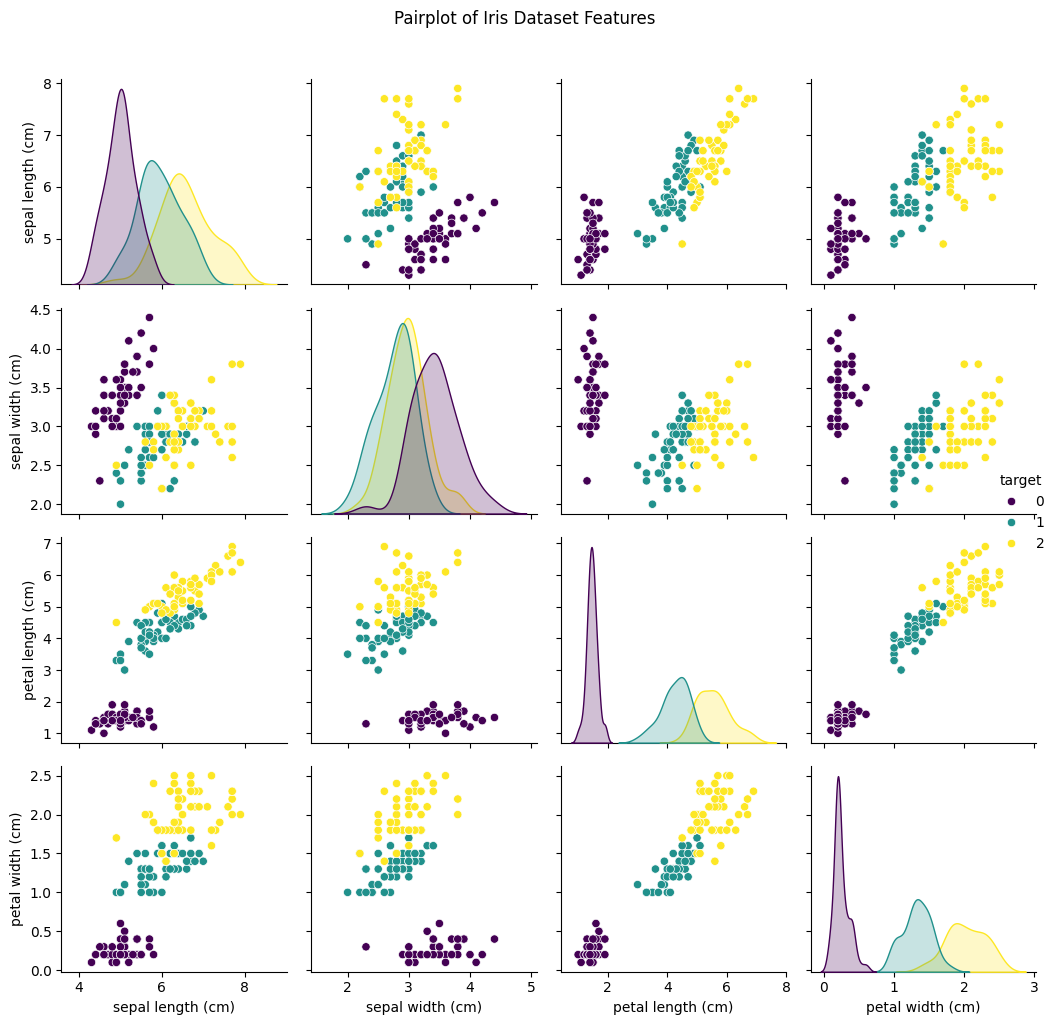

<ipython-input-8-88ad9bdc25a2>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=feature, data=df, palette='Set3')
<ipython-input-8-88ad9bdc25a2>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=feature, data=df, palette='Set3')
<ipython-input-8-88ad9bdc25a2>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=feature, data=df, palette='Set3')
<ipython-input-8-88ad9bdc25a2>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` varia

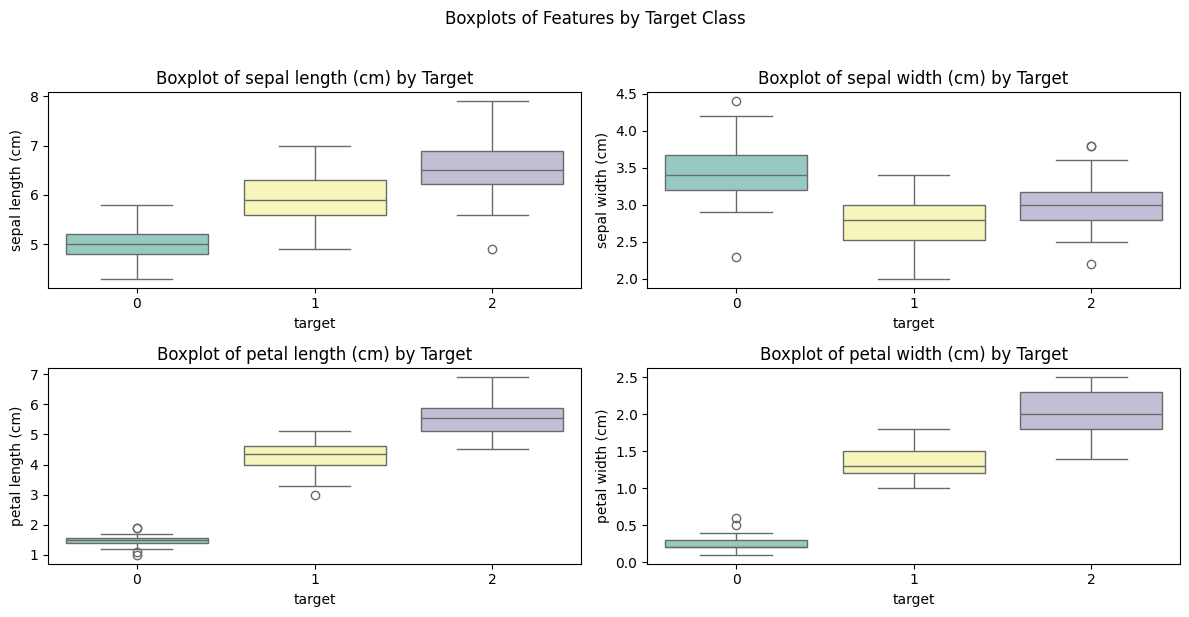

<ipython-input-8-88ad9bdc25a2>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette='pastel')


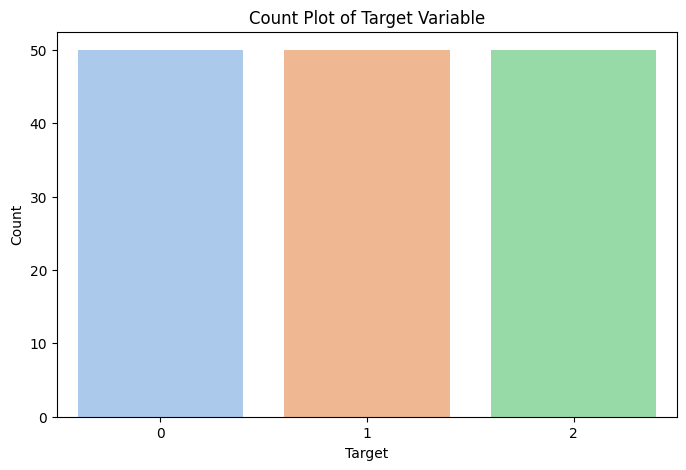

Best parameters: {'n_neighbors': 3, 'weights': 'uniform'}
Best cross-validation score (accuracy): 0.9583333333333334

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [8]:
# Import necessary libraries
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Convert data to DataFrame for easier analysis
df = pd.DataFrame(data=X, columns=iris.feature_names)
df['target'] = y

# Display basic statistics and information
print(f"Dataset shape: {df.shape}")
print(f"Columns: {df.columns}")
print(f"Target variable classes: {iris.target_names}")

# Heatmap for visualizing correlations
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

# Pairplot for visualizing relationships and distributions
sns.pairplot(df, hue='target', palette='viridis')
plt.suptitle('Pairplot of Iris Dataset Features', y=1.02)
plt.tight_layout()
plt.show()

# Box plots for feature distributions by target class
plt.figure(figsize=(12, 6))
for i, feature in enumerate(iris.feature_names):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='target', y=feature, data=df, palette='Set3')
    plt.title(f'Boxplot of {feature} by Target')
plt.suptitle('Boxplots of Features by Target Class', y=1.02)
plt.tight_layout()
plt.show()

# Count plots for target variable distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='target', data=df, palette='pastel')
plt.title('Count Plot of Target Variable')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter tuning with GridSearchCV
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1, 21), 'weights': ['uniform', 'distance']}
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score (accuracy): {grid_search.best_score_}")

# Predict and evaluate with best model
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))
